<a href="https://colab.research.google.com/github/wrodrigohs/portfolio/blob/main/wordcloud_meta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Contextualização**
Há cerca de 1 mês, o Gary Vee (empreendedor americano, quatro vezes escolhido melhor autor de best-sellers reconhecidos pelo New York Times, palestrante e guru do marketing) [entrevistou](https://www.youtube.com/watch?v=iwyyxEJCIuU) Mark Zuckerberg (um dos fundadores do Facebook e CEO da Meta) para falar sobre o Metaverso. Foi uma entrevista bem interessante, então resolvi fazer uma nuvem de palavras para mostrar o que foi mais falado.

O Google Colab não tem a biblioteca wordcloud instalada, por isso é necessário instalá-la.

In [4]:
# instalação da wordcloud
!pip install wordcloud -q

In [5]:
# importação dos pacotes necessários
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

In [6]:
# montagem do drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Para poder gerar a nuvem de palavras é necessário ter o texto da entrevista. 

Para isso eu criei um script Python para fazer essa transcrição, economizar tempo e agilizar o trabalho.

O arquivo .txt com a transcrição está disponibilizado [aqui](https://drive.google.com/file/d/1kgGgKaXcAt3_l1LvLN-gg3cP8SWFc_Qy/view?usp=sharing) caso você deseje baixá-lo para reproduzir esse código.

In [ ]:
# para leitura do arquivo .txt
texto = open('/content/gdrive/My Drive/transcricao_en.txt', 'r').read()
#print(string)

Nesta célula é gerada a nuvem de palavras. Para que a nuvem ficasse mais bonita eu decidi gerá-la dentro da logo da Meta (a imagem pode ser baixada [aqui](https://drive.google.com/file/d/16al4y5YRDBHRYzZg-UHIMHcO3Eg1X5GK/view?usp=sharing)).

Stopwords são as palavras excluídas da nuvem e já há 190 pré-definidas, mas, para meu contexto, eu defini algumas outras que também serão retiradas da nuvem. 

Logo abaixo eu apenas defini alguns parâmetros, gerei a nuvem e criei uma imagem .png no Google Drive.

In [9]:
# função para colorir a nuvem de palavras em azul
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "rgb(0, 0, 255)"

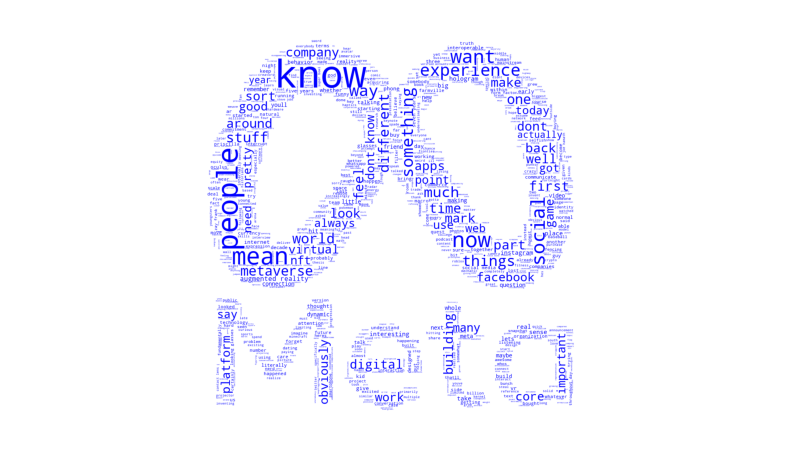

In [10]:
background_img = np.array(Image.open("/content/gdrive/My Drive/meta.jpg"))

# lista de stopwords
stopwords = set(STOPWORDS)
stopwords.update(["um", "youre", "weve", "uh", "theyre", "im", "whats", "ive", 
                  "see", "theres", "oh", "see", "will", "think", "thats", 
                  "lot", "thing", "yeah", "kind", "really", "gonna", "go",
                  "going", "right"])

# geração da wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1024, height=800, max_words=2000,
                      mask=background_img, max_font_size=200,
                      min_font_size=1).generate(texto)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file("entrevista_mark.png")

#**Conclusão**
A nuvem de palavras é uma forma muito interessante para fazer análises textuais. 

Sobre a entrevista é possível notar que alguns temas como experiência, jogo, holograma, virtual, social, digital, conexão, pessoas, virtual e, obviamente, metaverso foram abordados durante o programa.